<a href="https://colab.research.google.com/github/apchavezr/Analistica_de_negocios/blob/main/Simulacion_Escenarios_Comerciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de Escenarios Comerciales con Regresión Lineal

Este notebook demuestra cómo usar simulaciones para analizar escenarios de negocio. Se explora cómo las ventas proyectadas pueden verse afectadas por cambios en el precio y el gasto en marketing, utilizando un modelo de regresión lineal simple con dos variables explicativas.


## Escenario: Predicción de ventas bajo incertidumbre

Supóngase que una empresa colombiana de e-commerce desea anticipar el comportamiento de las ventas diarias dependiendo de:

📉 Variaciones en el precio unitario (en miles de COP).  
📈 Cambios en el presupuesto diario de marketing (en miles de COP).

Usamos un modelo de regresión lineal con coeficientes estimados de forma ficticia:

\[
\text{Ventas proyectadas} = \beta_0 + \beta_1 \cdot \text{Precio} + \beta_2 \cdot \text{Marketing}
\]

- \(\beta_0 = 200\): intercepto  
- \(\beta_1 = -2.5\): cada mil pesos de incremento en precio reduce ventas  
- \(\beta_2 = 3.0\): cada mil pesos adicionales en marketing aumenta ventas

Se realizaron 1000 simulaciones usando distribución normal para representar escenarios posibles de precios y marketing.


## Supuestos del modelo

Modelo lineal:

\[
\text{Ventas proyectadas} = \beta_0 + \beta_1 \cdot \text{Precio} + \beta_2 \cdot \text{Marketing}
\]

Donde:

- \(\beta_0 = 200\): intercepto.
- \(\beta_1 = -2.5\): cada mil pesos adicionales en el precio reducen las ventas.
- \(\beta_2 = 3.0\): cada mil pesos adicionales en marketing incrementan las ventas.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configuración inicial
n_simulaciones = 1000
precio_promedio = 100
gasto_marketing_promedio = 50
std_precio = 10
std_marketing = 15

# Coeficientes del modelo
beta_0 = 200
beta_1 = -2.5
beta_2 = 3.0

# Simulación
np.random.seed(42)
precios_simulados = np.random.normal(precio_promedio, std_precio, n_simulaciones)
marketing_simulado = np.random.normal(gasto_marketing_promedio, std_marketing, n_simulaciones)
ventas_simuladas = beta_0 + beta_1 * precios_simulados + beta_2 * marketing_simulado

# Resultados en DataFrame
df_simulaciones = pd.DataFrame({
    'Precio': precios_simulados,
    'Marketing': marketing_simulado,
    'Ventas_proyectadas': ventas_simuladas
})

df_simulaciones.head()

,Precio,Marketing,Ventas_proyectadas
0,104.967142,70.990332,150.553141
1,98.617357,63.869505,145.065123
2,106.476885,50.894456,86.491153
3,115.230299,40.295948,32.812099
4,97.658466,60.473350,137.273883


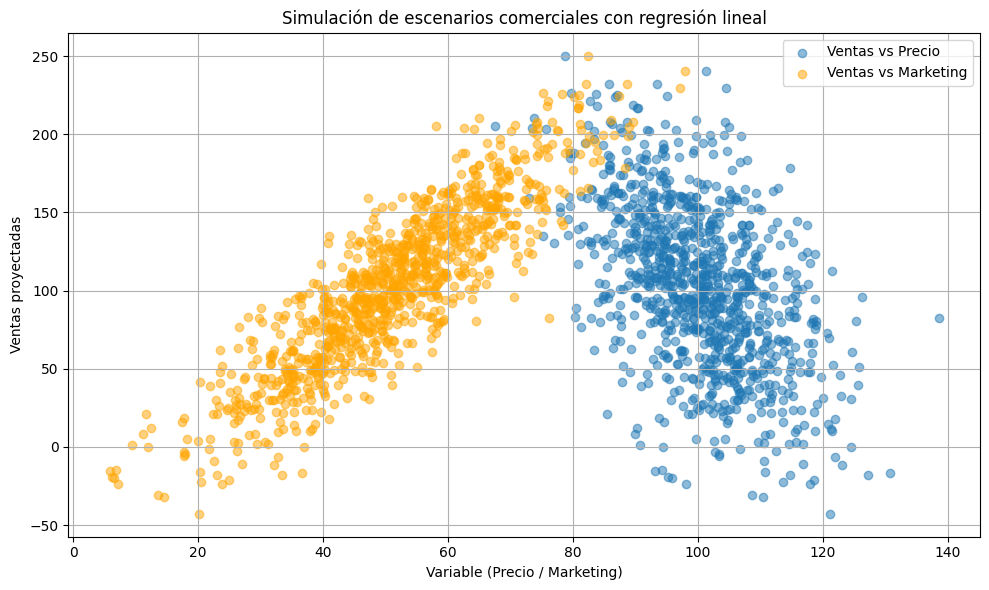

In [3]:
# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(df_simulaciones['Precio'], df_simulaciones['Ventas_proyectadas'], alpha=0.5, label='Ventas vs Precio')
plt.scatter(df_simulaciones['Marketing'], df_simulaciones['Ventas_proyectadas'], alpha=0.5, color='orange', label='Ventas vs Marketing')
plt.xlabel("Variable (Precio / Marketing)")
plt.ylabel("Ventas proyectadas")
plt.title("Simulación de escenarios comerciales con regresión lineal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Resultados de la simulación

Se obtuvo una nube de puntos que muestra la sensibilidad de las ventas frente a los cambios en las dos variables.

Como era de esperarse, al aumentar el precio, las ventas proyectadas tienden a disminuir; y al aumentar el marketing, tienden a incrementarse.

Puede explorar la tabla que se generó para ver los valores simulados de precio, marketing y ventas proyectadas para cada escenario. Esto le permite identificar combinaciones favorables para la toma de decisiones.


## Conclusiones

Este ejercicio permite observar cómo las decisiones de negocio, tales como ajustar el precio o modificar el gasto en marketing, pueden impactar los resultados en términos de ventas.

Estas simulaciones ayudan a gestionar la incertidumbre y tomar decisiones informadas con base en datos.
